In [1]:
!python --version

Python 3.13.7


In [2]:
import json

with open('week2.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)

list(data.keys())

['Nvidia', 'AMD', 'Intel']

In [3]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

In [4]:
from google import genai
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY", "")
client = genai.Client(api_key=GEMINI_API_KEY)

In [5]:
summary7day_prompt = """
You are an analyst specializing in the semiconductor industry. 

TASK:
Summarize risks and opportunities for **{chipmaker}** over the last 7 days based on extracted knowledge triplets.

INPUT FORMAT:
Each triplet has:
- subject
- relation (verb + optional detail)
- object

Triplets (past 7 days):
{triplets}

INSTRUCTIONS:
1. Carefully analyze the triplets to identify signals of **risks** (e.g., export restrictions, regulatory scrutiny, market struggles, competition, delays).
2. Identify **opportunities** (e.g., new product launches, strong demand, partnerships, positive analyst ratings, technological advances).
3. For each risk or opportunity, **cite the supporting triplet** in this format:
   subject -(verb[/detail])-> object
   Example: China -(scrutinizes)-> Nvidia
4. Organize into two sections:
   - **Risks for {chipmaker}**
   - **Opportunities for {chipmaker}**
5. At the end, write a **short summary outlook** combining both risks and opportunities.

OUTPUT FORMAT:
Risks for {chipmaker}:
- [triplet] → explanation
- ...

Opportunities for {chipmaker}:
- [triplet] → explanation
- ...

Outlook:
<short paragraph>
"""

In [6]:
chipmaker = "Nvidia"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of risks and opportunities for Nvidia over the past 7 days, based on the provided knowledge triplets:

### Risks for Nvidia:

*   **Geopolitical Headwinds & Market Access Restrictions:**
    *   Beijing -(bans/use of chips)-> Nvidia → China's continued ban on the use of Nvidia chips, and broader scrutiny, limits a significant market opportunity and necessitates costly adaptations.
    *   China -(bans/AI chips)-> Nvidia → Reinforces the above risk, specifically targeting Nvidia's core AI accelerator market in China.
    *   China -(scrutinizes)-> Nvidia → Increased regulatory and governmental oversight from China poses ongoing uncertainty and potential for further restrictions.
    *   Nvidia -(produces/two million RTX6000D Chinese)-> GPUs → Producing specific "Chinese" variants like the RTX6000D often implies adapting to export restrictions, potentially leading to lower margins or increased complexity compared 

In [7]:
chipmaker = "AMD"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of the risks and opportunities for AMD over the last 7 days based on the provided knowledge triplets:

### Risks for AMD:

*   **Tie-up -(implicates)-> AMD** → AMD is implicated in an unspecified "tie-up," which could suggest potential regulatory scrutiny, legal challenges, or negative associations.
*   **ROCm -(fails/to mention)-> Strix** → The ROCm software platform's failure to mention "Strix" (likely a new AMD processor architecture) could indicate a delay in software support or optimization, potentially hindering the market adoption of new hardware.
*   **AMD -(bumps/in accelerators)-> cadence** → This suggests AMD is encountering challenges or irregularities in the development or release schedule of its accelerator products.
*   **AMD -(trails)-> Nvidia** → AMD continues to lag a key competitor, Nvidia, likely in critical high-growth segments such as AI and data center GPUs, indicating competitive pressure

In [8]:
chipmaker = "Intel"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of risks and opportunities for Intel over the last 7 days:

### Risks for Intel:
*   **Analyst Downgrade:** Danely -(downgrade/to Sell)-> Intel → A prominent analyst firm, Danely, downgraded Intel's stock to "Sell," indicating a cautious outlook on its near-term financial performance and market position, despite a concurrently raised price target suggesting some underlying value potential.

### Opportunities for Intel:
*   **Strategic Partnership and Significant Investment from Nvidia:**
    *   Intel -(partner)-> Nvidia
    *   Nvidia -(invests/$5 billion)-> Intel
    *   Intel -(announces/partnership)-> Nvidia
    *   Intel -(develops/with Nvidia)-> products
    *   Intel -(detail/with Nvidia)-> roadmap
    *   Intel -(soars/on Nvidia stake)-> value
    *   Intel -(experience/nearly 23% )-> surge
    → A newly announced partnership with Nvidia, involving a substantial $5 billion equity investment, signals stro

In [9]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

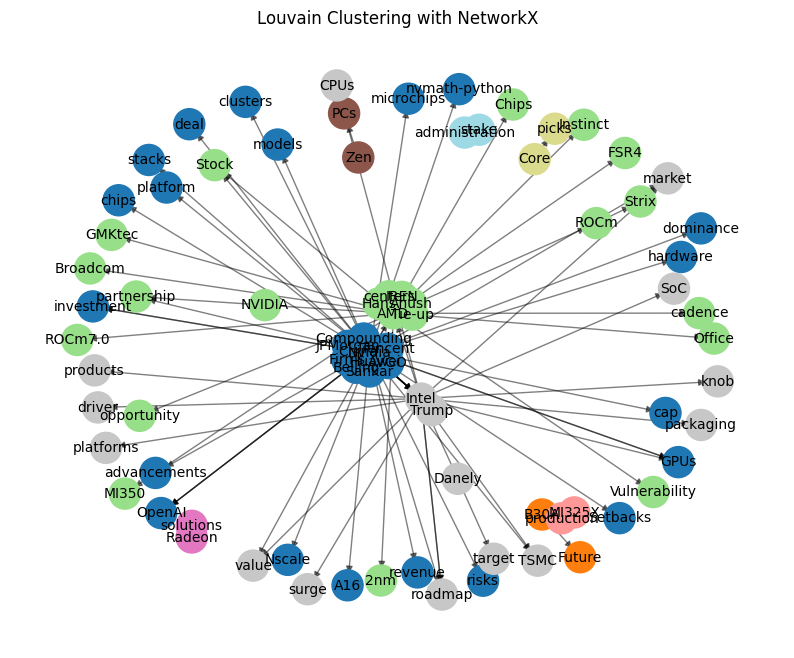

In [10]:
import matplotlib.pyplot as plt

communities = nx.community.louvain_communities(G, seed=123)

community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

pos = nx.spring_layout(G, seed=42)
node_colors = [community_map[n] for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Louvain Clustering with NetworkX")
plt.axis("off")
plt.show()